In [2]:
import numpy as np
import wave
import librosa
import librosa.display
from librosa.core import stft
import matplotlib.pyplot as plt
import scipy 
import matplotlib.cm as cm

In [3]:
def _wav2array(nchannels, sampwidth, data):
    """data must be the string containing the bytes from the wav file."""
    num_samples, remainder = divmod(len(data), sampwidth * nchannels)
    if remainder > 0:
        raise ValueError('The length of data is not a multiple of '
                         'sampwidth * num_channels.')
    if sampwidth > 4:
        raise ValueError("sampwidth must not be greater than 4.")

    if sampwidth == 3:
        a = np.empty((num_samples, nchannels, 4), dtype=np.uint8)
        raw_bytes = np.fromstring(data, dtype=np.uint8)
        a[:, :, :sampwidth] = raw_bytes.reshape(-1, nchannels, sampwidth)
        a[:, :, sampwidth:] = (a[:, :, sampwidth - 1:sampwidth] >> 7) * 255
        result = a.view('<i4').reshape(a.shape[:-1])
    else:
        # 8 bit samples are stored as unsigned ints; others as signed ints.
        dt_char = 'u' if sampwidth == 1 else 'i'
        a = np.fromstring(data, dtype='<%s%d' % (dt_char, sampwidth))
        result = a.reshape(-1, nchannels)
    return result


def readwav(file):
    """
    Read a wav file.
    Returns the frame rate, sample width (in bytes) and a numpy array
    containing the data.
    This function does not read compressed wav files.
    """
    wav = wave.open(file)
    rate = wav.getframerate()
    nchannels = wav.getnchannels()
    sampwidth = wav.getsampwidth()
    nframes = wav.getnframes()
    data = wav.readframes(nframes)
    wav.close()
    array = _wav2array(nchannels, sampwidth, data)
    return rate, sampwidth, array

In [4]:
audio = readwav('C:/Users/arshi/Downloads/1980s-Casio-Piano-C5.wav')[2]
print(audio.T[0])
audio = audio.astype(np.floating)

[ 13   0   4 ... -36 -27 -49]


C:\Users\arshi\Anaconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


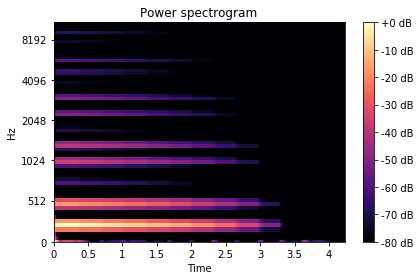

In [5]:
D = np.abs(librosa.feature.melspectrogram(audio.T[0], n_mels=64, fmax=2048))
librosa.display.specshow(librosa.amplitude_to_db(D,
                        ref=np.max),
                          y_axis='mel', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [94]:
print(np.amax(D[:,10],axis=0))
print(D.shape)

2870465093630.8325
(64, 182)


In [7]:
print(D.shape)

(1025, 182)


In [49]:
D[:,40].max()

2533423924805.7

In [58]:
q=np.argmax(D[:,],axis=0)
print(q)


[ 0  0  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  9  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 37 37 38]


NameError: name 'index' is not defined

In [46]:
np.argwhere(np.amax(D[:,40],axis=0))

array([[0]], dtype=int64)

In [28]:
np.transpose(np.nonzero(q))

SyntaxError: unexpected EOF while parsing (<ipython-input-28-17523d13419d>, line 1)

In [10]:
"""Pitch of oscillator"""

w=librosa.mel_frequencies(n_mels = 64, fmax = 2048)
q=np.argmax(D[:,180],axis=0)
print(q)
w[q]


18


484.3207409303188

In [ ]:
"""Get amplitude of each Mel bin. Classify them as F0, Overtone 1, Ovrrtone 2, ..
Output every freq to each oscillator"""

In [ ]:
""""""

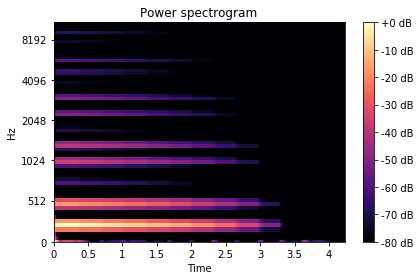

In [84]:
D = np.abs(librosa.feature.melspectrogram(audio.T[0], n_mels=64, fmax=2048))
librosa.display.specshow(librosa.amplitude_to_db(D,
                        ref=np.max),
                          y_axis='mel', x_axis='time')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()

In [92]:
print(D.shape)
print(type(D))
d = np.argsort(D, axis=0)
print(d)

(64, 182)
<class 'numpy.ndarray'>
[[45 42 42 ... 28 50 26]
 [42 31 45 ... 43 26 50]
 [56 45 56 ... 32 29 27]
 ...
 [ 1  5  9 ... 38 19 37]
 [ 4  4  0 ... 37 37 19]
 [ 0  0  4 ... 18 18 18]]


In [99]:
print(D[1:20])

[[3.29256989e+11 9.27679167e+10 3.32384035e+09 ... 3.09438327e+05
  3.99826880e+05 1.12689388e+06]
 [3.24920208e+10 9.89910903e+09 2.08127129e+08 ... 2.45056610e+04
  3.73950932e+04 1.76674363e+05]
 [2.51808376e+11 2.64482395e+11 2.24568891e+11 ... 4.21133463e+03
  2.80772303e+04 1.13722282e+05]
 ...
 [1.05117425e+07 1.42020705e+07 5.09913740e+06 ... 6.91803008e+05
  1.38290456e+06 4.56661185e+06]
 [2.96707229e+09 3.03325614e+09 2.79418040e+09 ... 3.32689608e+07
  2.95436531e+07 1.61736684e+07]
 [1.06006998e+10 2.98389414e+10 4.50372623e+10 ... 7.99897148e+06
  8.83502326e+06 1.46407139e+07]]


In [104]:
"""Bins """
max = D[0,10]
d = D
index = 0
for j in range (0,8):
    max = D[j*7,10]
    index=j*7
    for i in range (0,8):
        q = D[i+(7*j),10]
        if q>max:
            max = q
            index = (j*7) + i
    print(max)    
    print(index)

2870465093630.8325
4
392333534656.81366
9
47824872675.581825
19
31753530692.13386
24
8745914025.40146
34
9017718503.161068
39
1613218125.7442386
48
3289080292.9025073
51


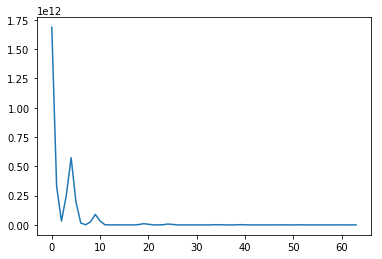

In [112]:
plt.plot(D[:,0])
plt.show()

In [27]:
q = scipy.signal.find_peaks(D [:,20])
print(properties)
print(q)

{}
(array([ 4,  9, 14, 19, 24, 29, 34, 39, 44, 48, 51, 54, 57, 60],
      dtype=int64), {})


In [28]:
w[q[0]]
#print(properties['peak_heights'])
#print(properties)

array([ 107.62683132,  242.16037047,  376.69390961,  511.22744876,
        645.76098791,  780.29452705,  914.8280662 , 1052.22342354,
       1208.82253064, 1350.72273697, 1467.97601187, 1595.40778609,
       1733.90163282, 1884.41782629])

In [32]:
a = D[q[0],20]
print(a)

[2.23591720e+12 3.05867184e+11 2.10444146e+09 3.73104437e+10
 2.47628844e+10 7.71490101e+08 6.82297808e+09 7.03666288e+09
 4.05747004e+08 1.26855989e+09 2.57598290e+09 2.60670583e+08
 4.61100850e+08 1.02461471e+09]
